This script calculates optimal pinhole camera models for each RGB and IR sensor,
and saves these models to disk.

* For stereo-paired sensors,
  `(tis_left, tis_right)`,
  `(real_sense_ir, real_sense_ir_right)`,
  `(phone_left_rgb, phone_right_rgb)`,
  `(phone_left_ir, phone_right_ir)`,
  a shared pinhole camera model is calculated.
* Each pinhole model is center-cropped so that the resulting image dimensions are divisible by 16,
  for full compatibility with JPEG, if required.

In [1]:
from pathlib import Path
import sys

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch

sys.path.append('/home/ovoinov/work/sk3d/dev.sk_robot_rgbd_data/src')
from skrgbd.calibration.calibrations.small_scale_sphere import Calibration
from skrgbd.data.dataset.pathfinder import Pathfinder
from skrgbd.data.processing.undistortion.optimal import get_optimal_pinhole
from skrgbd.calibration.camera_models.pinhole import PinholeCameraModel

from colmap.read_write_model import write_cameras_text

In [2]:
pathfinder = Pathfinder(
    data_root='/home/ovoinov/remotes/root.zhores/gpfs/data/gpfs0/3ddl/datasets/sk3d/dataset',
    aux_root='/mnt/sk3d/aux',
    raw_scans_root='/mnt/sk3d/raw_scans',
)

calibration = Calibration('/home/ovoinov/remotes/root.zhores/gpfs/data/gpfs0/o.voinov/sk3d/dev.sk_robot_rgbd_data/experiments/calibration/results/small_scale_sphere')

In [3]:
def crop_to_div(pinhole, div):
    wh = pinhole.size_wh
    new_wh = (wh // div) * div
    crop = wh - new_wh
    crop_start = crop // 2
    pinhole = pinhole.crop_(crop_start, new_wh)
    return pinhole

In [4]:
def save_pinhole(pinhole, cameras_txt, camera_i=0):
    Path(cameras_txt).parent.mkdir(parents=True, exist_ok=True)
    write_cameras_text({camera_i: pinhole.to_colmap(camera_i)}, cameras_txt)

## TIS

PinholeCameraModel(size_wh=(2372, 1967), focal=(2316.0, 2318.0), principal=(1181.0, 986.0))
PinholeCameraModel(size_wh=(2368, 1952), focal=(2316.0, 2318.0), principal=(1179.0, 979.0))


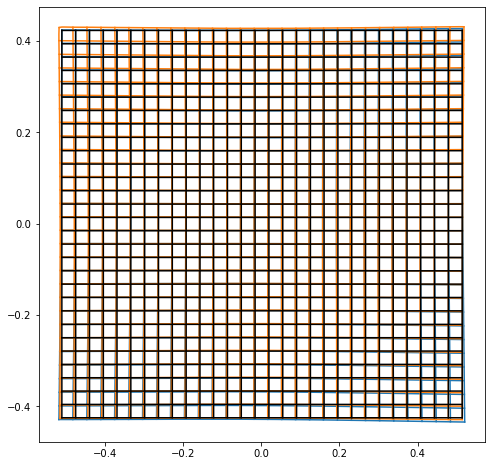

In [5]:
pinhole = get_optimal_pinhole([calibration.cam_model['tis_left'], calibration.cam_model['tis_right']], (8, 8))
print(pinhole)
pinhole = crop_to_div(pinhole, 16)
print(pinhole)

In [6]:
save_pinhole(pinhole, pathfinder.tis_left.rgb.pinhole_intrinsics)
save_pinhole(pinhole, pathfinder.tis_right.rgb.pinhole_intrinsics)

## RealSense

PinholeCameraModel(size_wh=(1878, 1038), focal=(1395.0, 1401.0), principal=(939.0, 519.0))
PinholeCameraModel(size_wh=(1872, 1024), focal=(1395.0, 1401.0), principal=(936.0, 512.0))


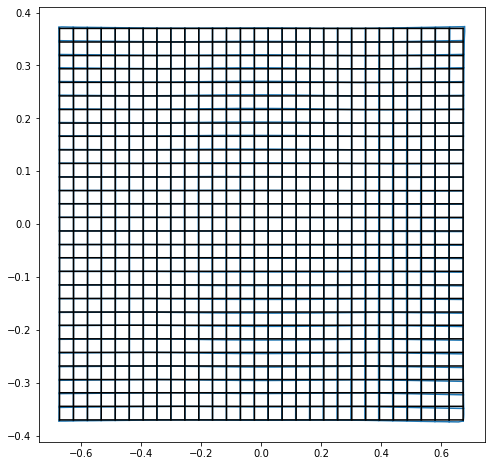

In [7]:
pinhole = get_optimal_pinhole(calibration.cam_model['real_sense_rgb'], (8, 8))
print(pinhole)
pinhole = crop_to_div(pinhole, 16)
print(pinhole)

In [8]:
save_pinhole(pinhole, pathfinder.real_sense.rgb.pinhole_intrinsics)

PinholeCameraModel(size_wh=(1257, 697), focal=(662.5, 656.5), principal=(629.0, 345.0))
PinholeCameraModel(size_wh=(1248, 688), focal=(662.5, 656.5), principal=(625.0, 341.0))


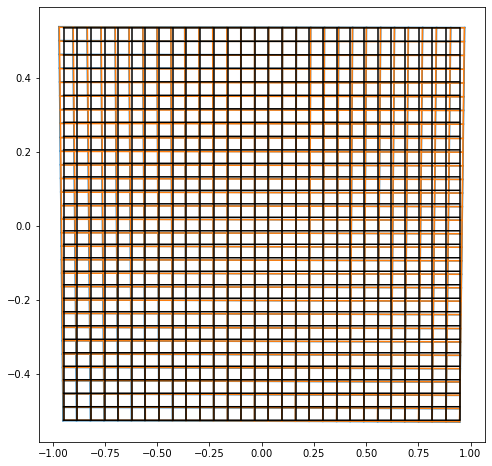

In [9]:
pinhole = get_optimal_pinhole([calibration.cam_model['real_sense_ir'], calibration.cam_model['real_sense_ir_right']], (8, 8))
print(pinhole)
pinhole = crop_to_div(pinhole, 16)
print(pinhole)

In [10]:
save_pinhole(pinhole, pathfinder.real_sense.ir.pinhole_intrinsics)
save_pinhole(pinhole, pathfinder.real_sense.ir_right.pinhole_intrinsics)

## Kinect

PinholeCameraModel(size_wh=(1886, 1046), focal=(1081.0, 1088.0), principal=(947.5, 522.0))
PinholeCameraModel(size_wh=(1872, 1040), focal=(1081.0, 1088.0), principal=(940.5, 519.0))


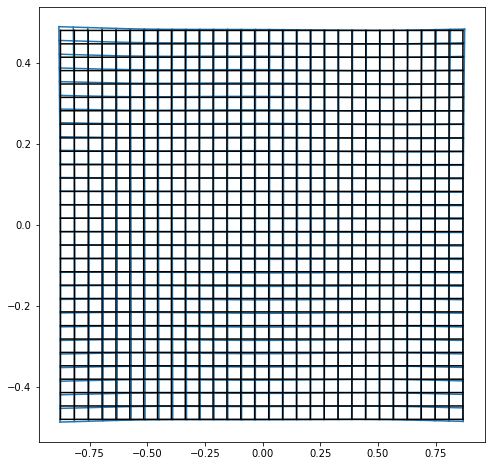

In [11]:
pinhole = get_optimal_pinhole(calibration.cam_model['kinect_v2_rgb'], (8, 8))
print(pinhole)
pinhole = crop_to_div(pinhole, 16)
print(pinhole)

In [12]:
save_pinhole(pinhole, pathfinder.kinect_v2.rgb.pinhole_intrinsics)

PinholeCameraModel(size_wh=(498, 410), focal=(362.5, 366.75), principal=(251.0, 208.125))
PinholeCameraModel(size_wh=(496, 400), focal=(362.5, 366.75), principal=(250.0, 203.125))


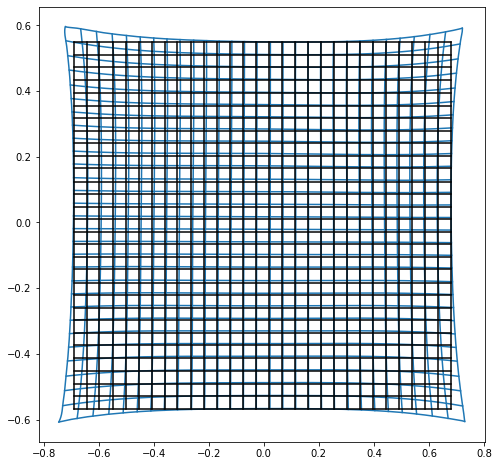

In [13]:
pinhole = get_optimal_pinhole(calibration.cam_model['kinect_v2_ir'], (8, 8))
print(pinhole)
pinhole = crop_to_div(pinhole, 16)
print(pinhole)

In [14]:
save_pinhole(pinhole, pathfinder.kinect_v2.ir.pinhole_intrinsics)

## Phones

PinholeCameraModel(size_wh=(7113, 5290), focal=(5740.0, 5752.0), principal=(3554.0, 2648.0))
PinholeCameraModel(size_wh=(7104, 5280), focal=(5740.0, 5752.0), principal=(3550.0, 2644.0))


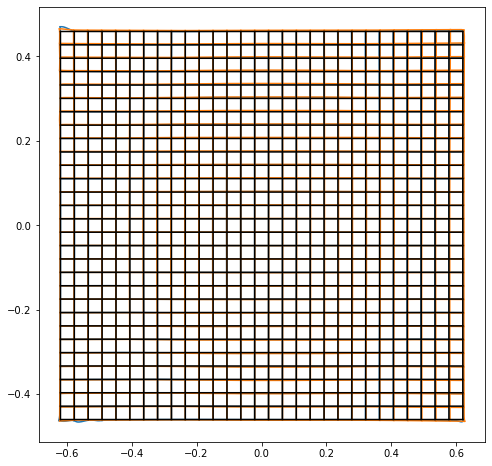

In [15]:
pinhole = get_optimal_pinhole([calibration.cam_model['phone_left_rgb'], calibration.cam_model['phone_right_rgb']], (8, 8))
print(pinhole)
pinhole = crop_to_div(pinhole, 16)
print(pinhole)

In [16]:
save_pinhole(pinhole, pathfinder.phone_left.rgb.pinhole_intrinsics)
save_pinhole(pinhole, pathfinder.phone_right.rgb.pinhole_intrinsics)

PinholeCameraModel(size_wh=(220, 160), focal=(192.5, 194.625), principal=(110.0625, 79.5625))
PinholeCameraModel(size_wh=(208, 160), focal=(192.5, 194.625), principal=(104.0625, 79.5625))


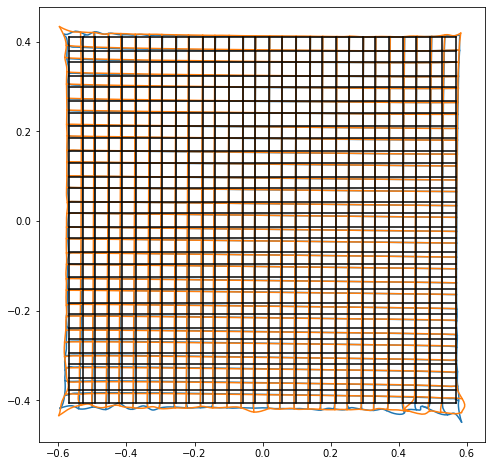

In [17]:
pinhole = get_optimal_pinhole([calibration.cam_model['phone_left_ir'], calibration.cam_model['phone_right_ir']], (8, 8))
print(pinhole)
pinhole = crop_to_div(pinhole, 16)
print(pinhole)

In [18]:
save_pinhole(pinhole, pathfinder.phone_left.ir.pinhole_intrinsics)
save_pinhole(pinhole, pathfinder.phone_right.ir.pinhole_intrinsics)

## SL

PinholeCameraModel(size_wh=(1920, 1408), focal=(3956.0, 3926.0), principal=(956.5, 695.0))
PinholeCameraModel(size_wh=(1920, 1408), focal=(3956.0, 3926.0), principal=(956.5, 695.0))


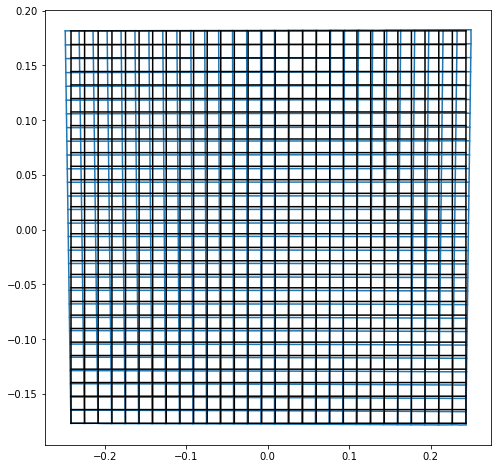

In [5]:
pinhole = get_optimal_pinhole(calibration.cam_model['stl_right'], (8, 8))
print(pinhole)
pinhole = crop_to_div(pinhole, 16)
print(pinhole)

In [6]:
save_pinhole(pinhole, pathfinder.stl_right.rgb.pinhole_intrinsics)